# Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’


You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data? You can choose any of the tool of your choice
(Python/R/Tableau/PowerBI/Excel)

IMPORT ALL NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


PERFORMING EXPLORATORY DATA ANALYSIS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.shape

(9994, 13)

In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [10]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

VISUALIZING CATEGORY VS SALES DATA:

<Figure size 360x360 with 0 Axes>

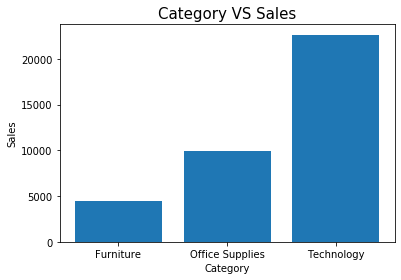

<Figure size 360x360 with 0 Axes>

In [11]:
plt.bar('Category','Sales',data=df)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Category VS Sales',size=15)
plt.figure(figsize=(5,5))

In [12]:
df_group = df.groupby('Segment')['Quantity'].sum().reset_index()
print(df_group)

       Segment  Quantity
0     Consumer     19521
1    Corporate     11608
2  Home Office      6744


VISUALIZING QUANTITIES ORDERED BY EACH SEGMENT

<Figure size 360x360 with 0 Axes>

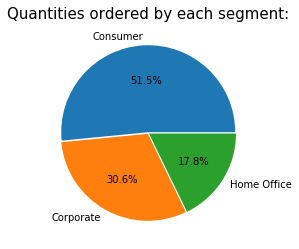

<Figure size 360x360 with 0 Axes>

In [13]:
labels=df['Segment'].unique()
plt.pie(df_group['Quantity'],explode=(0.01,0.01,0.01),autopct='%1.1f%%',labels=df.Segment.unique())
plt.title('Quantities ordered by each segment:',size= 15)
plt.figure(figsize=(5,5))

VISUALIZING MOSTLY USED SHIPPING MODES:

<Figure size 216x144 with 0 Axes>

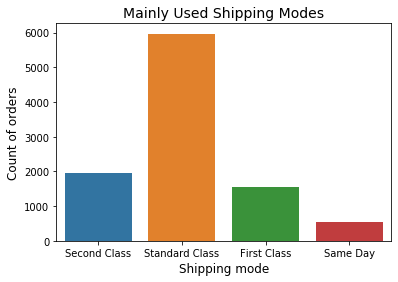

<Figure size 216x144 with 0 Axes>

In [14]:
sns.countplot('Ship Mode',data=df)
plt.title('Mainly Used Shipping Modes',size=14)
plt.xlabel('Shipping mode',size=12)
plt.ylabel('Count of orders',size=12)
plt.figure(figsize=(3,2))


In [15]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

STATES WITH MAXIMUM ORDERS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

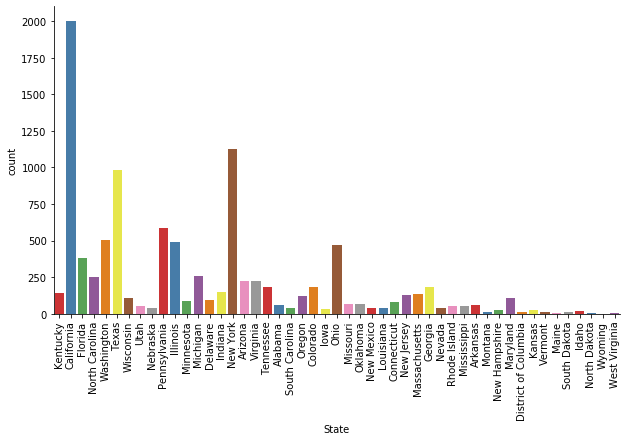

In [25]:
sns.catplot('State',kind='count',data=df,palette='Set1',height=5,aspect=1.8)
plt.xticks(rotation=90)

In [26]:
df_region=df.groupby('Region')['Quantity'].sum().reset_index()
df_region

,Region,Quantity
0,Central,8780
1,East,10618
2,South,6209
3,West,12266


Text(0.5, 1.0, 'Quantities ordered in each region:')

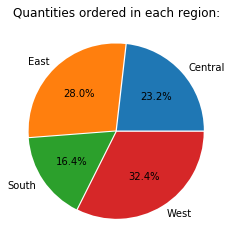

In [93]:
plt.pie(df_region['Quantity'],autopct='%1.1f%%',explode=(0.01,0.01,0.01,0.01),labels=df_region.Region)
plt.title('Quantities ordered in each region:')


In [36]:
df_profit=df.groupby('Category')['Profit'].sum().reset_index()
df_profit

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


CATEGORY VS PROFIT GRAPH

<BarContainer object of 3 artists>

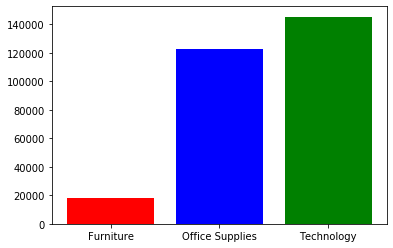

In [48]:
plt.bar('Category','Profit',data=df_profit,color=['red','blue','green'])


In [54]:
df_products=df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
df_products.reset_index(drop=True,inplace=True)
df_products

,Sub-Category,Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


TOP PROFITABLE PRODUCTS

(array([-30000., -20000., -10000.,      0.,  10000.,  20000.,  30000.,
         40000.,  50000.,  60000.]),
 <a list of 10 Text yticklabel objects>)

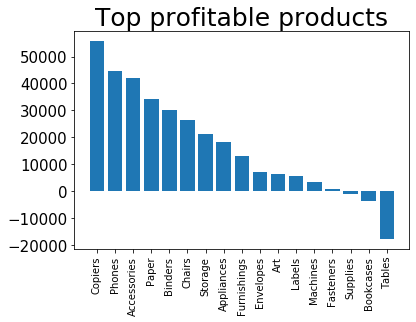

In [92]:
plt.bar('Sub-Category','Profit',data=df_products)
plt.title('Top profitable products',size=25)
plt.xticks(rotation=90)
plt.yticks(size=15)


# CONCLUSION:

FROM THE ABOVE DATA ANALYSIS WE CAN CONCLUDE THAT:

1."CONSUMER" SEGMENT HAS MAXIMUM ORDERS.

2.CATEGORY ACCOUNTING MAXIMUM NUMBER OF SALES IS "TECHNOLOGY".

3."STANDARD CLASS" IS THE MAJORLY PREFERRED SHIPPING MODE.

4.CATEGORY ACCOUNTING MAXIMUM PROFIT IS "TECHNOLOGY"

5.SUB-CATEGORIES SUCH AS "TABLES AND BOOKCASES" HAVE SHOWN NEGATIVE PROFIT WHILE "COPIERS AND PHONES" HAVE SHOWN MAXIMUM PROFIT.

6."WEST AND EAST REGIONS" ACCOUNT FOR MAXIMUM NUMBER OF ORDERS.